##LENDING CLUB CASE STUDY 

###The lending club case study is about deriving useful insights about loans that can help lenders identify critical areas while issuing creditlines/ loans. During this process, my background in finance has helped me derive meaningful insights, with precise application. The Notebook is sequential : 
1. We start with data cleansing- removing redundant rows, and columns, while also cleaning up NULL values, and dealing with them effectively. 
2. After we clean up the data, we move into Univariate analysis, followed by Bivariate analysis. 
3. Combining multiple variables, I have attemped a few 3D plots too 
---3D scatter plot 
---Months since last delinq (Immediate default probability)
---Loan to income ratio 
---next payment 

In [1]:
#importing libraries required for analysis- numpy, pandas, and visualization libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 
import statistics 
import re 

###DATA CLEANSING 

In [2]:
#Check the CSV file for consistency

loanprocess = pd.read_csv("loan.csv")

#Checking the first few rows tof the data set
#print(loanprocess.head())
#print(loanprocess.dtypes)

#Checking for null values. Fixing Rows, columns, and Null Values, before beginning the analysis

#Number of empty rows: No values in the row
print(loanprocess.isnull().all(axis = 1).sum())

#Drop columns with all null values: dropna function
#Number of empty columns; by default the all function uses the number of columns

loanprocess_clean = loanprocess.dropna(how='all',axis = 1)
print(loanprocess_clean)
print(loanprocess_clean.isnull().all().sum())




0
            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B        B2  ...          NaN   
1  

/Applications/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [188]:

#Dropping the additional columns 
#The member ID is not required because we already have an ID to map with 
#The zipcode is not an important factor and seems like a random variable. 
loanprocess_clean.drop(labels = ["member_id","zip_code","desc", "mths_since_last_delinq","mths_since_last_record", "next_pymnt_d","url","emp_title","tax_liens","policy_code","initial_list_status"], axis = 1, inplace = True)
loanprocess_clean.shape
loanprocess_clean.head(2)

lp = loanprocess_clean

#The employee term column has the extra word 'months',interest rate (%) and the emp_length has unnecessary strings too. Let's clean that up 
#We want the interest rate and the other numbers to be numeric, rather than strings. 
lp['term'] = lp['term'].str.replace('months','').astype(int)
lp['int_rate'] = lp['int_rate'].str.replace ('%','').astype(float)
lp['emp_length'] = lp['emp_length'].str.extract ('(\d+)').astype(float)
lp['revol_util'] = lp ['revol_util'].str.rstrip('%').astype(float)
lp.head(2)


#Check data type 
lp.info()


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  int64  
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  float64
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/3783006424.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp['term'] = lp['term'].str.replace('months','').astype(int)
/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/3783006424.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp['int_rate'] = lp['int_rate'].str.replace ('%','').astype(float)
/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/3783006424.py:14: SettingWithCopyWarning: 
A value is trying to 

EXPLORATORY DATA ANALYSIS (UNIVARIATE) 

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8473b43190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8473b3c220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8473b43760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8473b3c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8473b3cfd0>],
 'means': []}

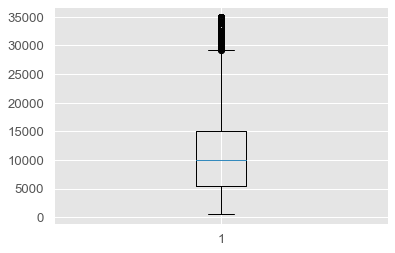

In [189]:
#The loan amount taken on average is crucial for any analysis. 
#Checking for outliers. The loan amount will determine the ideal loan amount to issue, and whether there has been 
#a rampant growth in the industry 
print(lp['loan_amnt'].describe())
plt.boxplot(lp.loan_amnt)


0    24000.0
1    30000.0
Name: annual_inc, dtype: float64
count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64


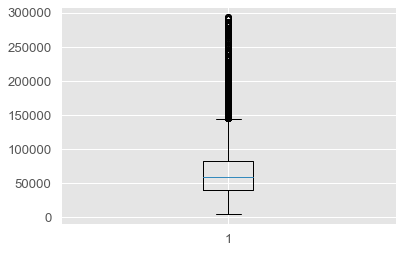

In [190]:
#OUTLIER TREATMENT- making sure that there are no skews created 
#Data Cleaning, and removal of data beyond the 99.5th percentile

#Boxplot of annual income. 
#The boxplot will reveal the existence of outliers 
plt.boxplot(lp.annual_inc)
%matplotlib inline

#Removing the outliers 
lp = lp[lp["annual_inc"] < lp['annual_inc'].quantile(0.995)]
print(lp["annual_inc"].head(2))
plt.boxplot(lp.annual_inc)
print(lp["annual_inc"].describe())


 CORRELATIONS and DISTRIBUTIONS 

(array([ 302., 1458., 3682., 5630., 5765., 4980., 4115., 3634., 2442.,
        2049., 1279.,  606., 1018.,  561.,  398.,  406.,  233.,  190.,
         175.,   78.,  176.,   50.,   59.,   42.,   34.,   57.,   12.,
          16.,   29.,   18.]),
 array([  4000.        ,  13666.66666667,  23333.33333333,  33000.        ,
         42666.66666667,  52333.33333333,  62000.        ,  71666.66666667,
         81333.33333333,  91000.        , 100666.66666667, 110333.33333333,
        120000.        , 129666.66666667, 139333.33333333, 149000.        ,
        158666.66666667, 168333.33333333, 178000.        , 187666.66666667,
        197333.33333333, 207000.        , 216666.66666667, 226333.33333333,
        236000.        , 245666.66666667, 255333.33333333, 265000.        ,
        274666.66666667, 284333.33333333, 294000.        ]),
 <BarContainer object of 30 artists>)

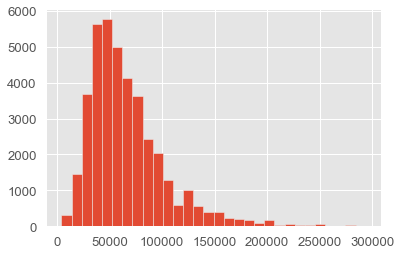

In [191]:
#Annual income histogram, showcasing the peak income
a = lp.annual_inc
mean = statistics.mean(lp.annual_inc)
sd = statistics.stdev(lp.annual_inc)
  
plt.hist(a,bins = 30)

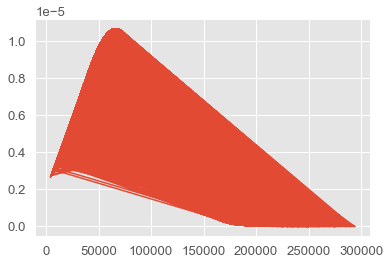

In [192]:
#Annual income - distribution
plt.plot(a, norm.pdf(a, mean, sd))
plt.show()

/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/2089767290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp['monthly_income'] = lp['annual_inc']/12
/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/2089767290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp['instaltoincome'] = lp['installment']/lp['monthly_income']
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From versi

0        0.081435
1        0.023932
2        0.082595
3        0.082759
4        0.010169
           ...   
39712    0.008555
39713    0.183587
39714    0.018821
39715    0.009323
39716    0.139325
Name: instaltoincome, Length: 39494, dtype: float64


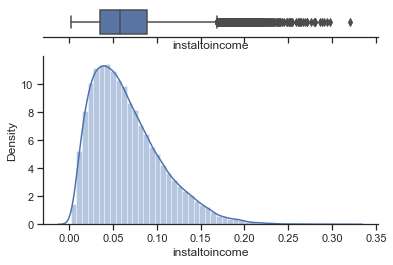

In [193]:
#Installment to income ratio 
#Adding a monthly income column

lp['monthly_income'] = lp['annual_inc']/12
lp['instaltoincome'] = lp['installment']/lp['monthly_income']
print(lp['instaltoincome'])

#The code given below is a commented version of the matplotlib code used for testing
#plt.hist(lp.instaltoincome,bins = 30) 

#Presented Seaborn code 

sns.set(style="ticks")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(lp['instaltoincome'], ax=ax_box)
sns.distplot(lp['instaltoincome'], ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

#Selecting rows and checking the default rate when the Installment to income ratio is greater than 15%
default_check = lp.loc[lp['instaltoincome']>0.15]

###From the above, we can clearly see the following: 
1. When the Monthly installment is greater than 15% of the monthly income, there is a slight cause of concern, as it is to the tail of the distribution, and an anomaly.
2. The next step of analysis would be to check how many of these loans are defaults (Charge offs) compared to the overall. 

DETAILED ANALYSIS OF PAYABILITY BASED ON INSTALLMENT AMOUNTS AND MONTHLY INCOME 

In [194]:
#Extracting the rows with installment to income ratio greater than or equal to 15
instal_15plus = lp.loc[lp['instaltoincome']>=0.15]
print(instal_15plus)

#Category wise loan charge offs (default probability based on sector)
print("The frequency of defaults of loans by category/ requirement")
(instal_15plus.purpose.value_counts()*100)/len(instal_15plus)

#Loan status for individuals with a higher installment per month (Determination of payability)
total = instal_15plus.loan_status.count()
loan_ratio_check = instal_15plus.loan_status.value_counts()/total
print(loan_ratio_check)

#Number of fully paid loans. 
total = lp.loan_status.count()
loan_info = lp.loan_status.value_counts()/total
print(loan_info)

#The results yielded clearly show the increase in the charge off rate. 
#There is a 50% increase in delinquency when the ratio of installment to income increase to 15% or more. 
#Therefore, these customers must be understood and anallysed in greater depth before a loan issuance


            id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
31     1069539      31825        31825     31825.000000    36      7.90   
67     1069030      16425        16425     16425.000000    36     14.27   
106    1068326      24000        24000     24000.000000    36     10.65   
116    1061814      10000        10000     10000.000000    36      8.90   
121    1068006      19750        19750     19725.000000    36     10.65   
...        ...        ...          ...              ...   ...       ...   
39613   136491       5000         5000      1574.995234    36     12.17   
39666   119043      15450        15450       600.000000    36     11.22   
39696   102376      25000        25000       525.000000    36     10.59   
39700    98276       5400         5400       200.000000    36      7.75   
39713    90665       8500         8500       875.000000    36     10.28   

       installment grade sub_grade  emp_length  ... last_pymnt_amnt  \
31          995.82     A    

/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/2224593424.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


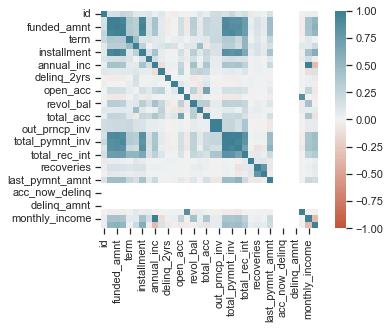

In [195]:
#Correlation mapping using seaborn. Determining the most important variables 

#print(lp.corr())
plot_data = sns.heatmap(lp.corr(), vmin = -1, vmax = 1, center = 0 , cmap = sns.diverging_palette(20,220, n = 200), square = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)
plt.show()



#DETAILED UNIVEARIATE ANALYSIS ON IMPORTANT FIELDS 

In [196]:
# Analysis of the loan amount, funded amount and investor funded amount 

#The ratio of the loan amount to the funded amount must be less than 1.1 
#If the ratio is greater than 1.1, it implies that the funding is less than the amount applied for 
ratio_fi = lp['loan_amnt']/lp['funded_amnt_inv']

loanratio = [ratio_fi > 1.5]

loan_amtbyfund = pd.DataFrame(loanratio).transpose()
print(loan_amtbyfund.head())
print(loan_amtbyfund.value_counts())
print("The ratio of the number of loans where the funded amount is at least 66%")
print((loan_amtbyfund.value_counts())/len(loan_amtbyfund))

#The result is that in 7% of the cases, the funded amount of the loan is less than 66% of the requested 
#This could reflect the CREDIT score of the person, or the past loan history 



       0
0  False
1  False
2  False
3  False
4  False
False    36659
True      2835
dtype: int64
The ratio of the number of loans where the funded amount is at least 66%
False    0.928217
True     0.071783
dtype: float64


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


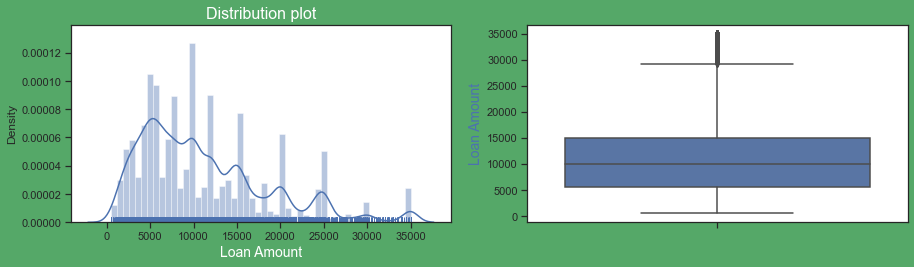

In [197]:
# Univariate Analysis on Loan amount
# for reference:https://www.youtube.com/watch?v=4DnWYK88-E4

plt.figure(figsize=(15,8),facecolor='g')
# Plotting the distribution of the loan amounts 
plt.subplot(2, 2, 1)
ax = sns.distplot(lp['loan_amnt'],rug = True)
ax.set_title('Distribution plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

#Plotting the box plot to identify the loan amounts greater 
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=lp['loan_amnt'])
ax.set_title('Box Plot',fontsize=16,color='g')
ax.set_ylabel('Loan Amount',fontsize=14,color='b')
plt.show()

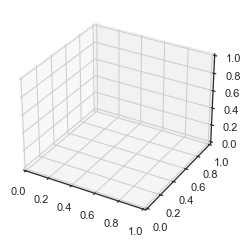

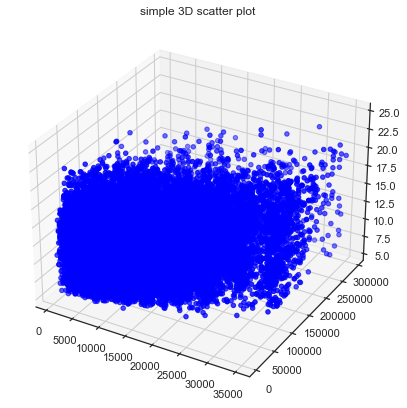

In [198]:
#3D Plotting- MULTIVARIATE ANALYSIS
#loan amount, income, and interest rate 

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

xaxis = lp['loan_amnt']
yaxis = lp['annual_inc']
zaxis = lp['int_rate']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(xaxis, yaxis, zaxis, color = "blue")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()


Text(0.5, 1.0, 'Interest rates ')

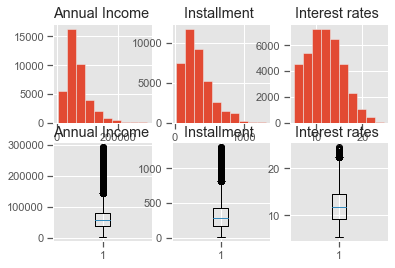

In [199]:
# Univariate Analysis on Annual Income, installment amount ,interest rate
#category of loans and the amounts 

loan_category= (lp.purpose.value_counts()*100)/len(lp)

#The very simple observation here is that Debt consolidation and Credit card loans are the most common
#This indicates that the issuance of loans to clear 'existing'loans might be of concern 

#Univariate analysis begins
x1 = lp['annual_inc']
x2 = lp['installment']
x3 = lp ['int_rate']
x4 = loan_category 

plt.style.use ('ggplot')


fig , axs = plt.subplots(2, 3)
axs [0,0].hist(x1)
axs[0,0].set_title ("Annual Income ")
axs [0,1].hist(x2)
axs[0,1].set_title ("Installment ")
axs [0,2].hist(x3)
axs[0,2].set_title ("Interest rates ")
axs [1,0].boxplot(x1)
axs[1,0].set_title ("Annual Income ")
axs [1,1].boxplot(x2)
axs[1,1].set_title ("Installment ")
axs [1,2].boxplot(x3)
axs[1,2].set_title ("Interest rates ")




BIVARIATE ANALYSIS 

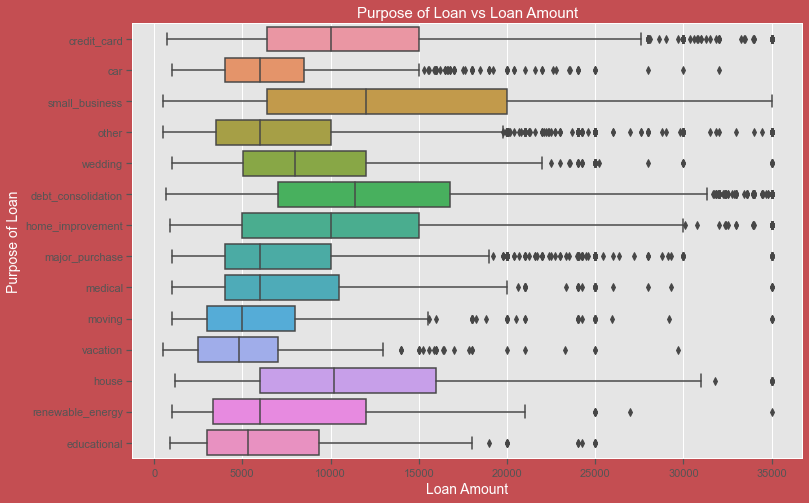

In [200]:
# WHY WAS THE LOAN TAKEN? 
# The purpose of the loan and the loan amount has a correlation too, let's study the same 

plt.figure(figsize=(12,8),facecolor='r')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =lp)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()



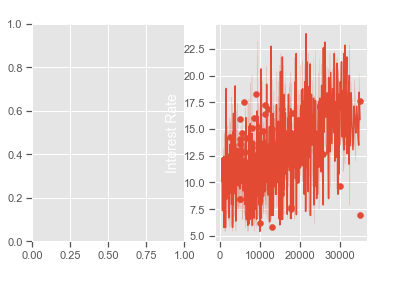

In [201]:
#LOAN AMOUNT and INTEREST RATE- A line graph study 

fig , (ax1,ax2) = plt.subplots(1,2)
#plt.figure(figsize=(14,8),facecolor='b')
ax1 = sns.lineplot(y='int_rate', x='loan_amnt', data =lp)
ax1.set_title('Loan amount vs Interest Rate',fontsize=15,color='w')
ax1.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax1.set_xlabel('Loan Amount',fontsize=14,color = 'w')

ax2.scatter (lp['loan_amnt'].sample(n= 50),lp['int_rate'].sample(n = 50))
plt.show()



In [202]:
#Implications of DEBT TO INCOME RATIO
#Line graph analysis of DEBT TO INCOME RATIO AND LOAN AMOUNT 

lp ['debtinc'] = lp['funded_amnt_inv']/ lp['annual_inc']
print(lp['debtinc'].head(10))

risky_customer = pd.DataFrame()
risky_customer = lp.loc[lp['debtinc']>=0.75]
print (risky_customer)






0    0.207292
1    0.083333
2    0.195886
3    0.203252
4    0.037500
5    0.138889
6    0.148923
7    0.062500
8    0.140000
9    0.356667
Name: debtinc, dtype: float64
           id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
9333   838602      22750        22750          22725.0    60     15.62   
11969  805663      35000        35000          34975.0    60     12.99   
19724  670629      26000        26000          25975.0    60     18.25   

       installment grade sub_grade  emp_length  ... last_credit_pull_d  \
9333        548.66     D        D1         8.0  ...             Oct-14   
11969       796.18     C        C1        10.0  ...             Jan-14   
19724       663.78     F        F1         8.0  ...             Mar-11   

       collections_12_mths_ex_med application_type acc_now_delinq  \
9333                          0.0       INDIVIDUAL              0   
11969                         0.0       INDIVIDUAL              0   
19724                        

/var/folders/8y/nymw71mx2nj7xtqbk3twnrmm0000gn/T/ipykernel_1032/3333138224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lp ['debtinc'] = lp['funded_amnt_inv']/ lp['annual_inc']
